In [1]:
# DON'T FORGET TO ACTIVATE THE GPU when on google colab (Edit > Notebook settings)

from os import environ
GOOGLE_COLAB = True if "COLAB_GPU" in environ else False
if GOOGLE_COLAB:
    !pip install swyft

In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(27)
torch.manual_seed(27)

In [3]:
DEVICE = swyft.set_device(gpu=True)
MAX_EPOCHS = 10
EXPECTED_N = 4000

In [4]:
def simulator(z):
    return np.array([z[0],2*(z[1]-z[0])])

def noise(x, z = None, noise=0.01):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.55,0.45])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [5]:
points, re = swyft.run(
    x0, 
    simulator, 
    zdim = 2, 
    noise = noise, 
    device = DEVICE, 
    n_train = 10000, 
    n_rounds = 4,
    early_stopping_patience = 2
)

Simulate:   2%|▏         | 230/9979 [00:00<00:04, 2298.50it/s]

Creating new cache.
Adding 9979 new samples. Run simulator!


Simulate: 100%|██████████| 9979/9979 [00:03<00:00, 3300.30it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 80.34758746623993
Validation loss: 63.6376995742321
Validation loss: 61.18728253245354
Validation loss: 80.79830011725426
Validation loss: 62.14661192893982
Total epochs: 5
LR iteration 1
Validation loss: 56.022750839591026
Validation loss: 53.12667813152075
Validation loss: 49.93179766833782
Validation loss: 52.94737488031387
Validation loss: 54.55547274649143
Total epochs: 5


Simulate:   3%|▎         | 336/9687 [00:00<00:02, 3356.35it/s]

Constrained posterior area: 0.020199839457469598
Adding 9687 new samples. Run simulator!


Simulate: 100%|██████████| 9687/9687 [00:02<00:00, 3314.26it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 243.54251408576965
Validation loss: 227.86055755615234
Validation loss: 217.2579402923584
Validation loss: 194.43247199058533
Validation loss: 199.74998331069946
Validation loss: 201.68842720985413
Total epochs: 6
LR iteration 1
Validation loss: 181.45273327827454
Validation loss: 181.95622491836548
Validation loss: 178.77230405807495
Validation loss: 176.4961212873459
Validation loss: 182.03062987327576
Validation loss: 179.36856019496918
Total epochs: 6


Simulate:  15%|█▍        | 331/2222 [00:00<00:00, 3309.85it/s]

Constrained posterior area: 0.015604219202773975
Adding 2222 new samples. Run simulator!


Simulate: 100%|██████████| 2222/2222 [00:00<00:00, 3097.86it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 237.91886258125305
Validation loss: 217.55883121490479
Validation loss: 191.12322282791138
Validation loss: 197.10569405555725
Validation loss: 194.55696177482605
Total epochs: 5
LR iteration 1
Validation loss: 182.47737383842468
Validation loss: 177.85781490802765
Validation loss: 177.89282369613647
Validation loss: 180.12592434883118
Total epochs: 4


Simulate: 100%|██████████| 2/2 [00:00<00:00, 1427.36it/s]

Constrained posterior area: 0.015600780645441134
Adding 2 new samples. Run simulator!
yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.


LR iteration 0
Validation loss: 245.49049520492554
Validation loss: 222.76330375671387
Validation loss: 205.03147280216217
Validation loss: 196.41349720954895
Validation loss: 188.01111578941345
Validation loss: 186.24557173252106
Validation loss: 220.61842393875122
Validation loss: 184.61364924907684
Validation loss: 189.2964619398117
Validation loss: 198.4160326719284
Total epochs: 10
LR iteration 1
Validation loss: 185.2229254245758
Validation loss: 183.25582671165466
Validation loss: 175.7149373292923
Validation loss: 184.43100893497467
Validation loss: 183.23580014705658
Total epochs: 5


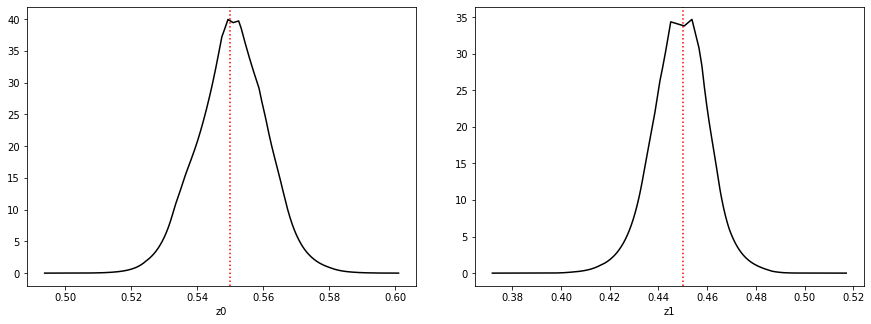

In [6]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys',max_n_points=10000)

In [7]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(
    max_epochs=MAX_EPOCHS, 
    batch_size=32, 
    lr_schedule=[1e-3, 1e-4],
    early_stopping_patience=2,
)

yshape (shape of features between head and legs): 2
Start training
LR iteration 0
Validation loss: 27.53282606601715
Validation loss: 20.370254546403885
Validation loss: 20.462638646364212
Validation loss: 20.498438328504562
Total epochs: 4
LR iteration 1
Validation loss: 18.171175867319107
Validation loss: 17.35084806382656
Validation loss: 16.914485976099968
Validation loss: 16.4017633497715
Validation loss: 17.807579278945923
Validation loss: 16.284667029976845
Validation loss: 16.984693117439747
Validation loss: 15.882772296667099
Validation loss: 16.575641110539436
Validation loss: 16.71805213391781
Total epochs: 10


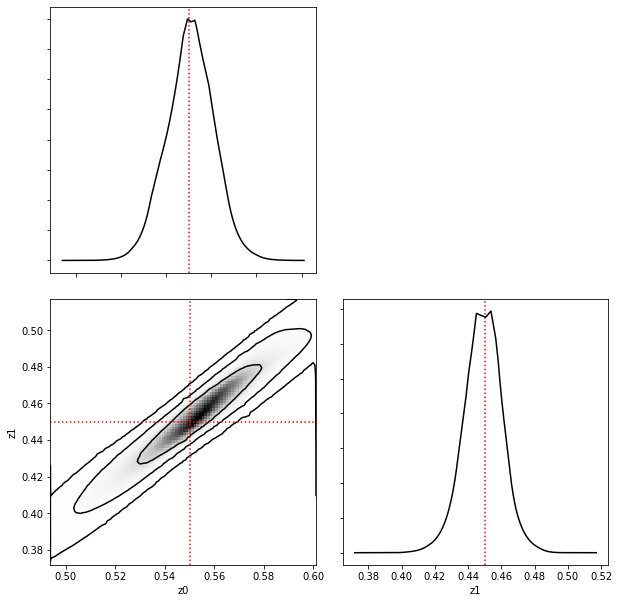

In [8]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10, max_n_points = 10000)